In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
dt = pd.read_csv('D:/Machine-Learning-Project-2023.2/data/Mumbai_House_Price.csv')
dt.info()
dt.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [5]:
print(dt.isnull().sum())

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64


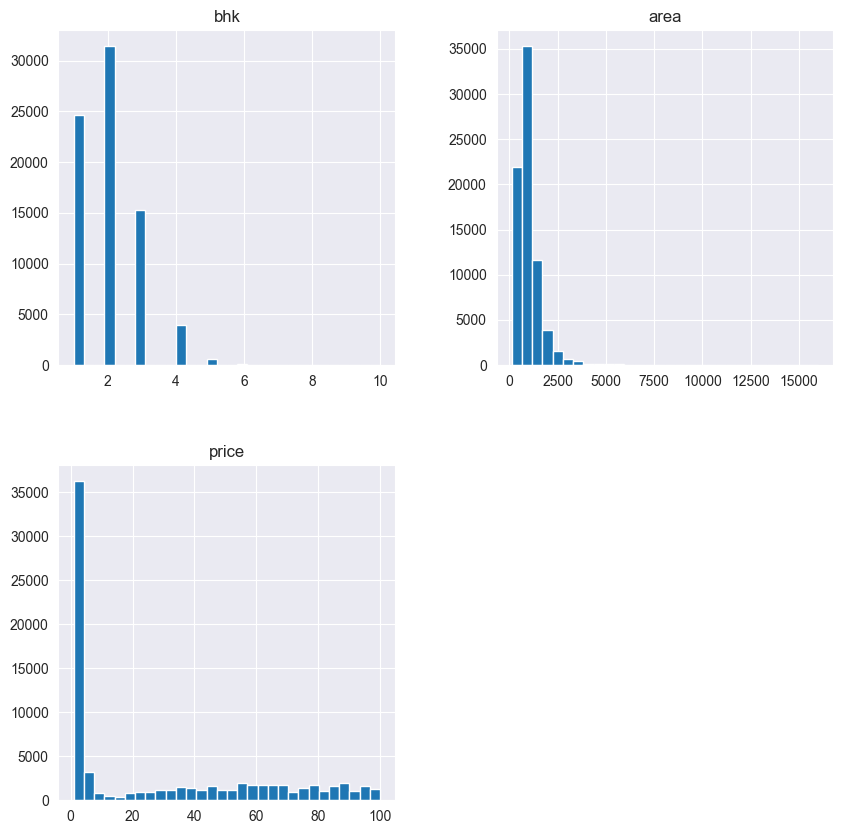

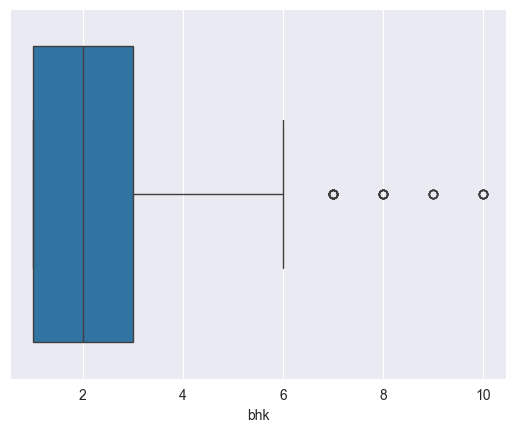

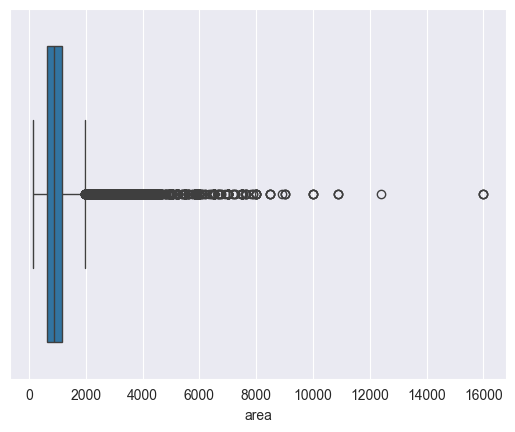

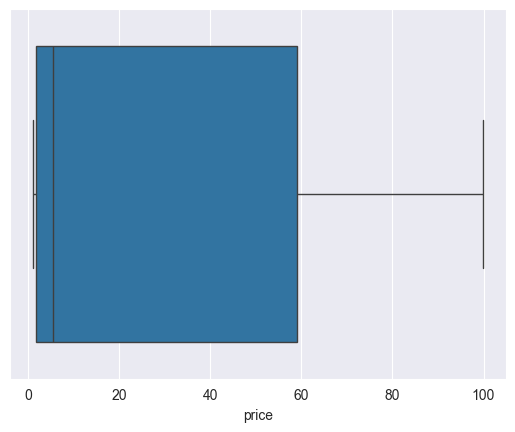

In [6]:
#color_counts = dt['type'].value_counts()
#print(color_counts)
dt.hist(bins=30, figsize=(10, 10))
plt.show()
# Box plots to detect outliers
for col in dt.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=dt[col])
    plt.show()

# Pair plot to explore relationships between numerical features
#sns.pairplot(dt)
#plt.show()

# Correlation matrix
#corr_matrix = dt.corr()
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.show()


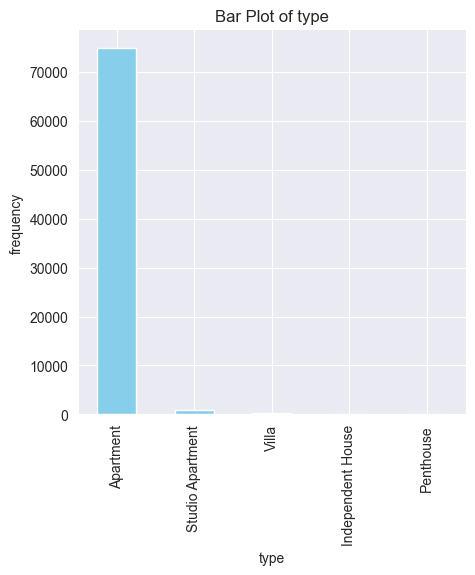

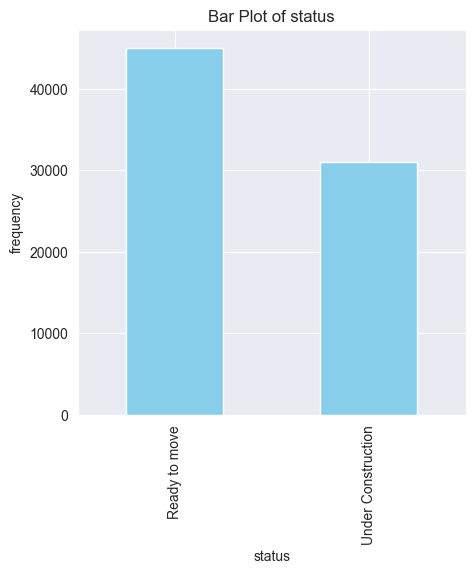

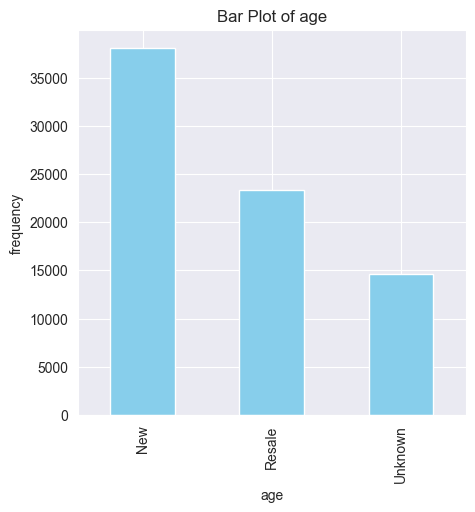

In [7]:
import matplotlib.pyplot as plt

needs_visualize = ['type', 'status', 'age']

for col in needs_visualize:
    dt[col].value_counts().plot(kind='bar', color='skyblue', figsize=(5, 5))
    plt.xlabel(dt[col].name)
    plt.ylabel('frequency')
    plt.title('Bar Plot of ' + dt[col].name)
    plt.show()
# Plot bar plot for a categorical column 'color'


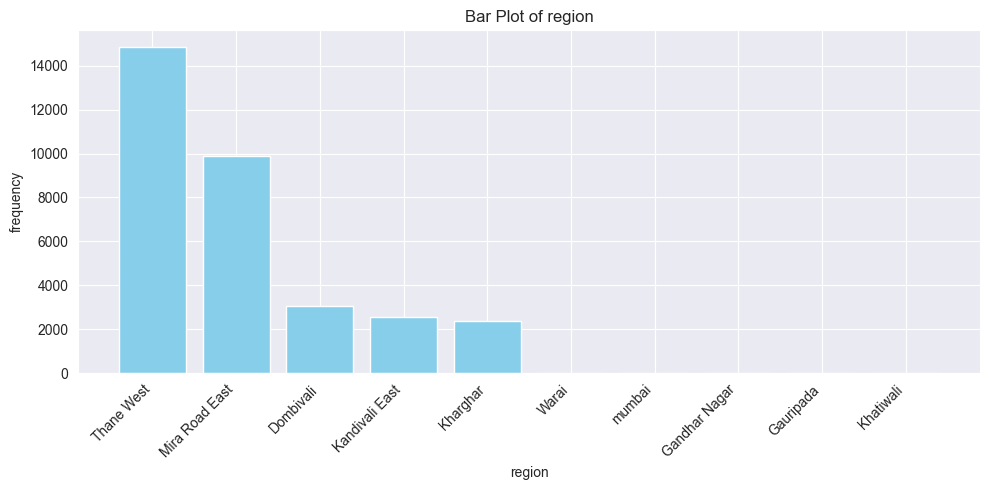

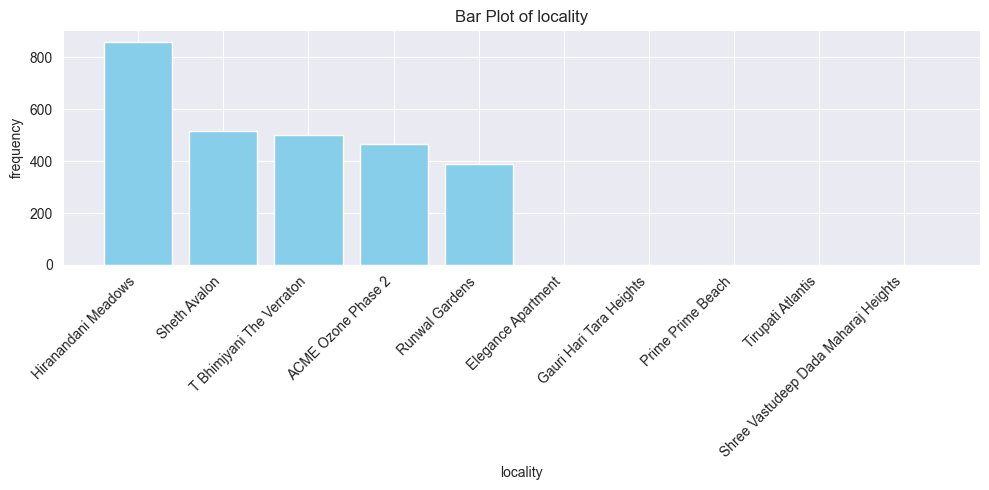

In [8]:
top_5 = ['region', 'locality']
for col in top_5:
    top_highest = dt[col].value_counts().nlargest(5)
    top_shortest = dt[col].value_counts().nsmallest(5)
    top_categories = pd.concat([top_highest, top_shortest])
    plt.figure(figsize=(10, 5))
    plt.bar(top_categories.index, top_categories.values, color='skyblue')
    plt.xlabel(dt[col].name)
    plt.ylabel('frequency')
    plt.title('Bar Plot of ' + dt[col].name)
    plt.xticks(rotation=45, ha='right')  # Rotate X-axis labels to 45 degrees
    plt.tight_layout()
    plt.show()

In [9]:
 df = dt
 for index in df.index:
    price = dt.loc[index, 'price']
    price_unit = df.loc[index, 'price_unit']

    # Process price
    if price_unit == 'Cr':
        df.loc[index, 'price_in_USD'] = (price * 10000000 * 0.012)
    elif price_unit == 'L':
        df.loc[index, 'price_in_USD'] = (price * 100000 * 0.012)   


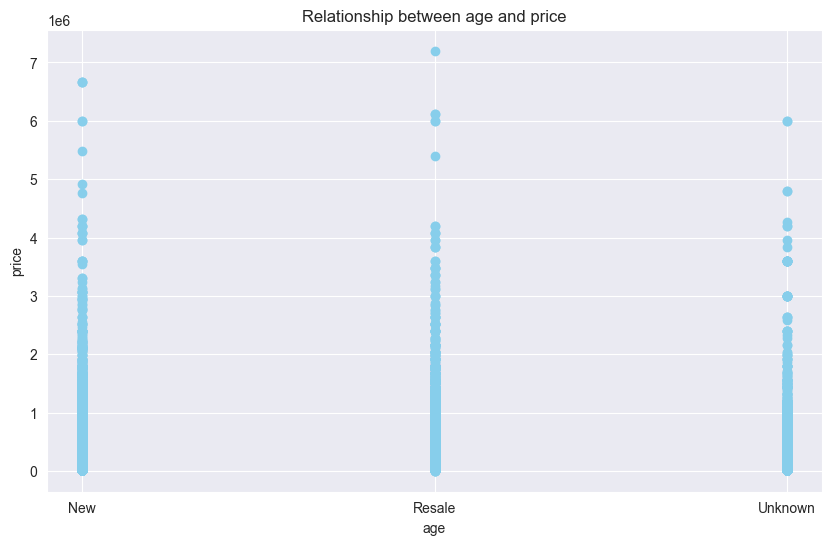

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df['age'], df['price_in_USD'], color='skyblue')
plt.xlabel('age')
plt.ylabel('price')
plt.title('Relationship between age and price')
plt.grid(True)
plt.show()

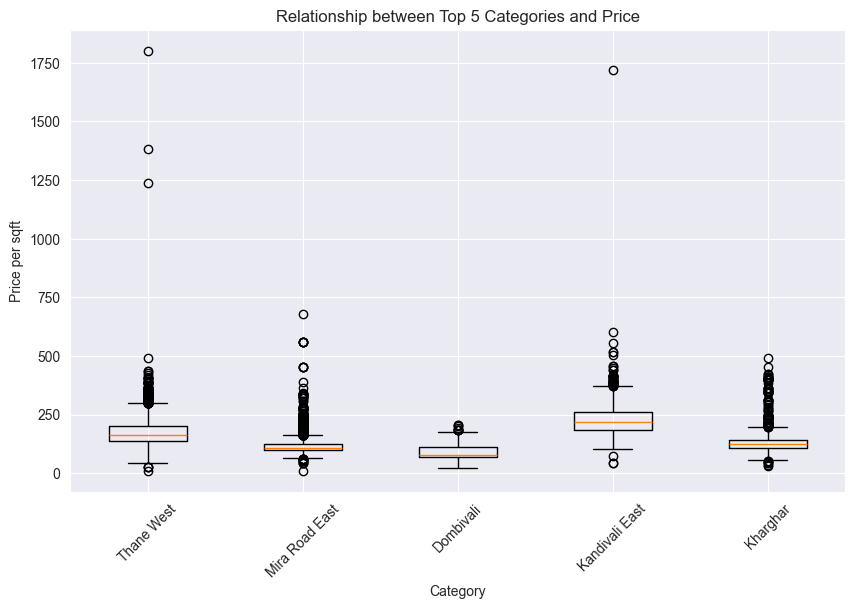

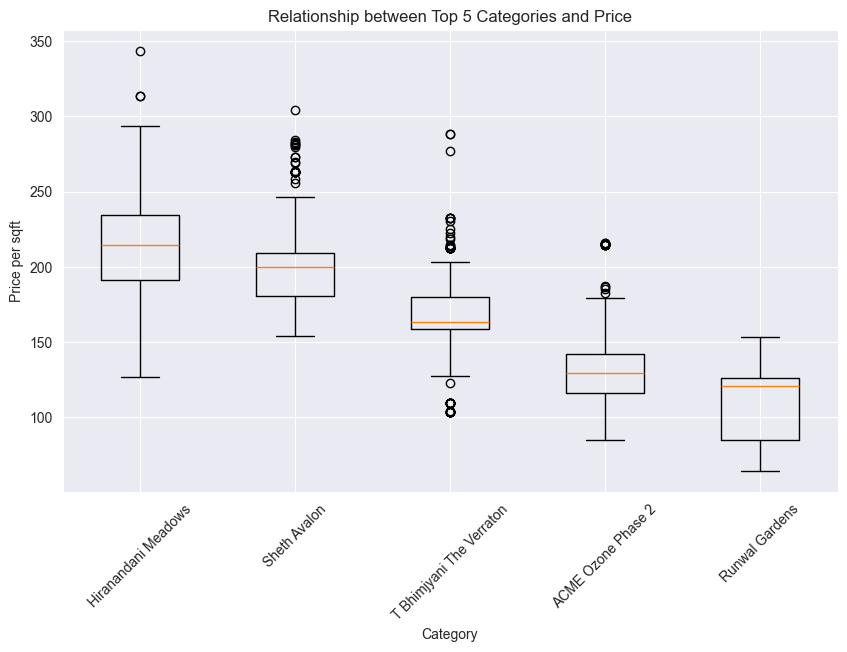

In [11]:
top_5 = ['region', 'locality']
df['price_per_sqft'] = df['price_in_USD'] / df['area']
for col in top_5:
    top_5_categories = df[col].value_counts().nlargest(5).index
    df_top_5 = df[df[col].isin(top_5_categories)]

    # Plot a box plot to visualize the relationship between the top categories and price
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45)
    plt.xlabel('Category')
    plt.ylabel('Price per sqft')
    plt.title('Relationship between Top 5 Categories and Price')
    plt.grid(True)
    plt.boxplot([df_top_5[df_top_5[col] == category]['price_per_sqft'] for category in top_5_categories], labels=top_5_categories)
    plt.show()


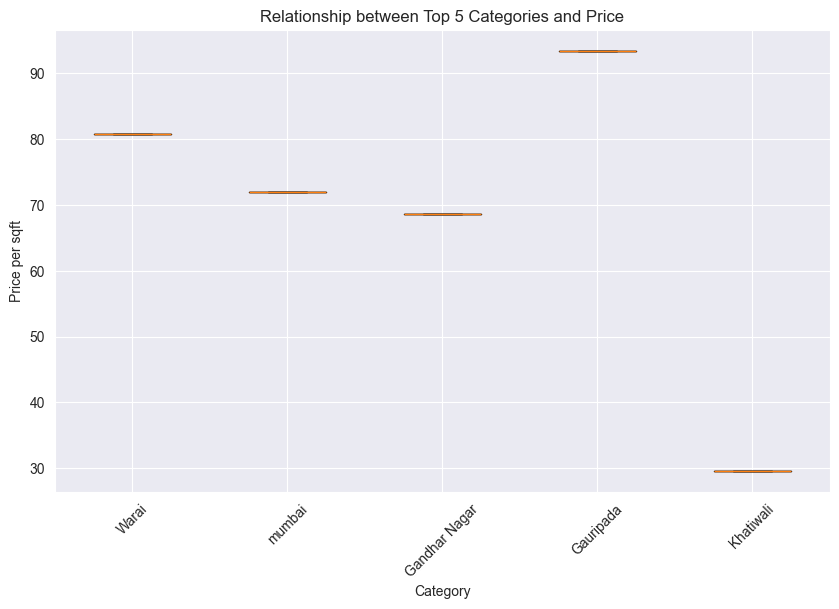

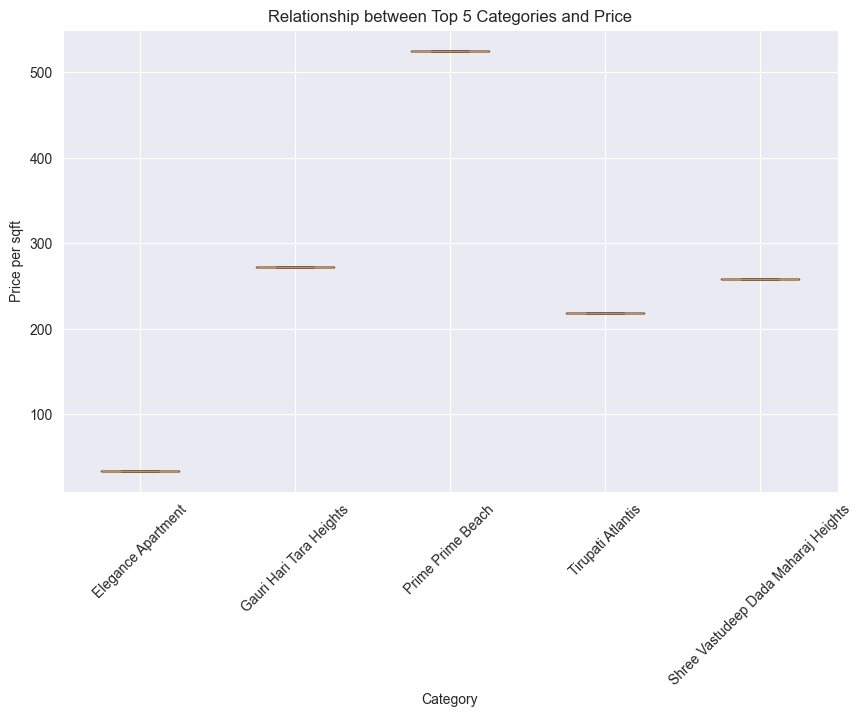

In [12]:
top_5 = ['region', 'locality']
df['price_per_sqft'] = df['price_in_USD'] / df['area']
for col in top_5:
    top_5_categories = df[col].value_counts().nsmallest(5).index
    df_top_5 = df[df[col].isin(top_5_categories)]

    # Plot a box plot to visualize the relationship between the top categories and price
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45)
    plt.xlabel('Category')
    plt.ylabel('Price per sqft')
    plt.title('Relationship between Top 5 Categories and Price')
    plt.grid(True)
    plt.boxplot([df_top_5[df_top_5[col] == category]['price_per_sqft'] for category in top_5_categories], labels=top_5_categories)
    plt.show()

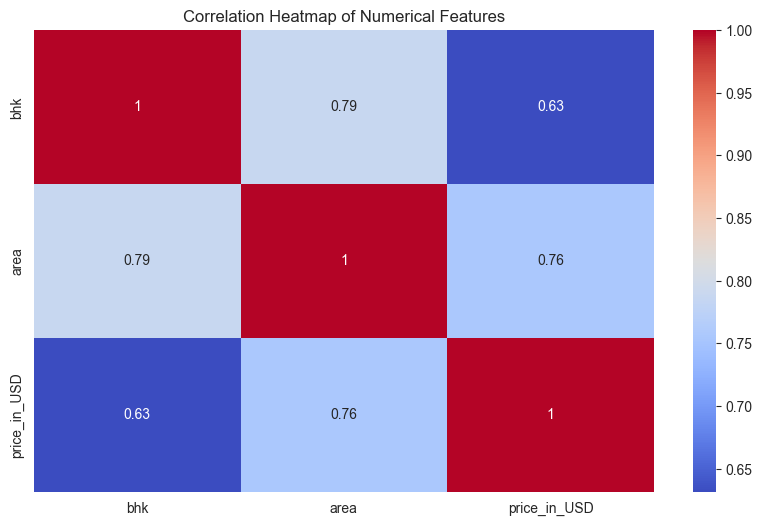

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['bhk', 'area', 'price_in_USD']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

[  8 124  31 140 117 141  28 154  15  51  16  93  34  68 205  72 147  55
 194 213  26   2   5  30 217  91 198  78  67 120 136  62 190 151  56 197
  47  86 125  61  79  96   7  41  83 104 208 108  59  40  20  80  76 131
  75  84  57  50 119 130   6   1 134 215  74  88 155 132  81 204  24 157
 185   4 133 148 113 100 196 188  94 128  23  95   9 220 189 191  38  22
  32 192 206 207 107  37 193 126  44 123 153 167 156  85  71 222 139 114
  66  21 212  18 161 171 127 102 165  39 163 186 172  11 214 116  82 150
 177  69 216 115 218  89 175 149  25 166 170 169  19 160 121 219 158 200
  46 135  48 178  64 180 199 184  63 227 101 179 224  97 145 159 146  43
 112 164  73  65  42 176  90  13 168  45 209 195  12  10 143  77 202   3
 142 211 187  98  60 129  27 174 152 183  29  14  87  49  52  17 223 103
  36 137 111 182 203  54  53 105 221 225  92  33 122  35 106 226 201 110
  58 118 162 138  70   0 210 181 144 173 109  99]


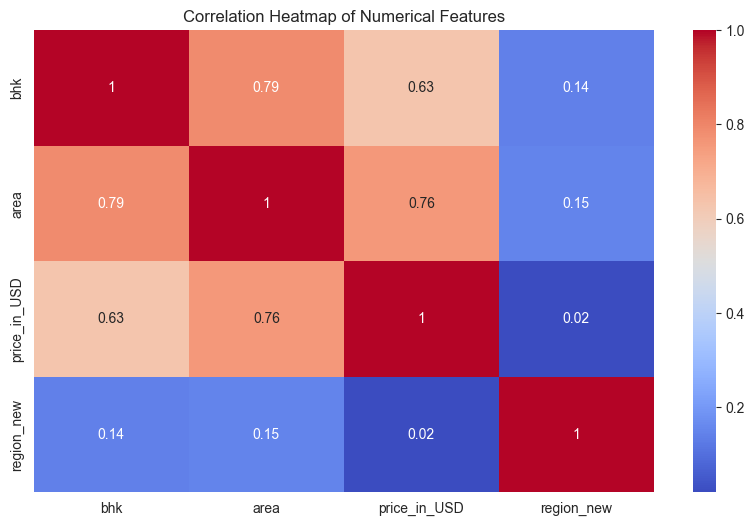

In [14]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['region_new'] = label_encoder.fit_transform(df['region'])
plt.figure(figsize=(10, 6))
sns.heatmap(df[['bhk', 'area', 'price_in_USD', 'region_new']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
print(df['region_new'].unique())
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bhk             76038 non-null  int64  
 1   type            76038 non-null  object 
 2   locality        76038 non-null  object 
 3   area            76038 non-null  int64  
 4   price           76038 non-null  float64
 5   price_unit      76038 non-null  object 
 6   region          76038 non-null  object 
 7   status          76038 non-null  object 
 8   age             76038 non-null  object 
 9   price_in_USD    76038 non-null  float64
 10  price_per_sqft  76038 non-null  float64
 11  region_new      76038 non-null  int32  
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 6.7+ MB


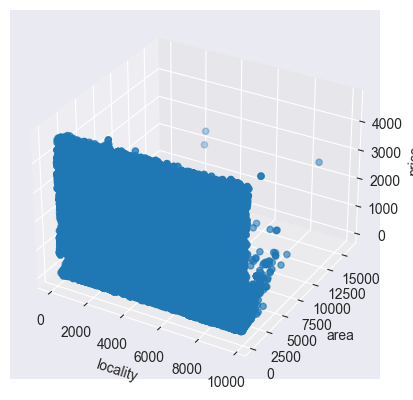

In [17]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['locality_new'] = label_encoder.fit_transform(df['locality'])
distinct_values = df['locality_new'].nunique()
print(distinct_values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['locality_new'], df['area'], df['price'].astype('category').cat.codes)
ax.set_xlabel('locality')
ax.set_ylabel('area')
ax.set_zlabel('price')
plt.show()

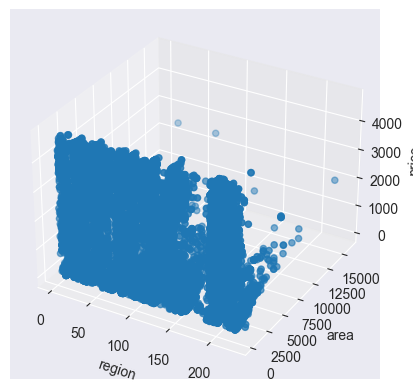

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
distinct_values = df['region'].nunique()
print(distinct_values)
ax.scatter(df['region_new'], df['area'], df['price'].astype('category').cat.codes)
ax.set_xlabel('region')
ax.set_ylabel('area')
ax.set_zlabel('price')
plt.show()

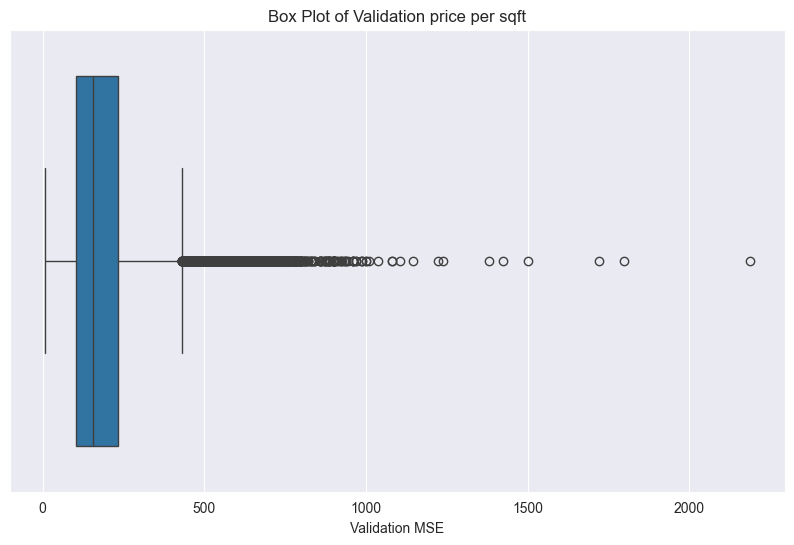

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_per_sqft'])
plt.title('Box Plot of Validation price per sqft')
plt.xlabel('value of price per sqft')
plt.show()

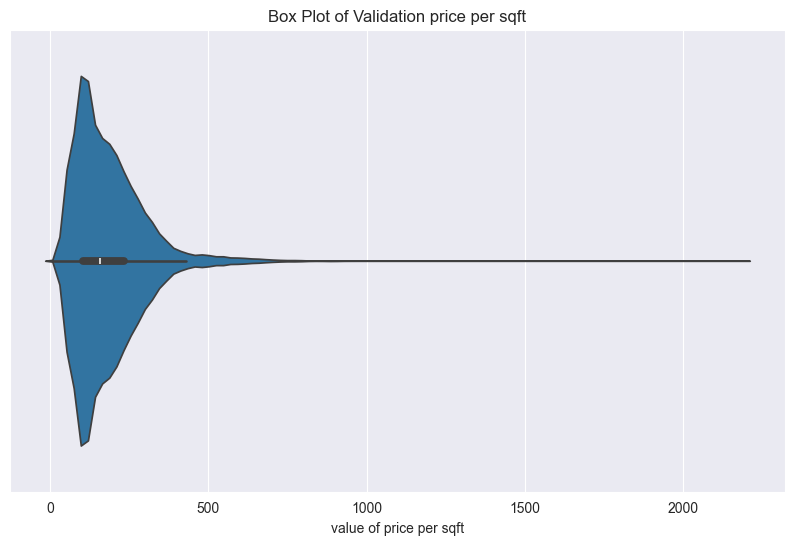

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['price_per_sqft'])
plt.title('Box Plot of Validation price per sqft')
plt.xlabel('value of price per sqft')
plt.show()

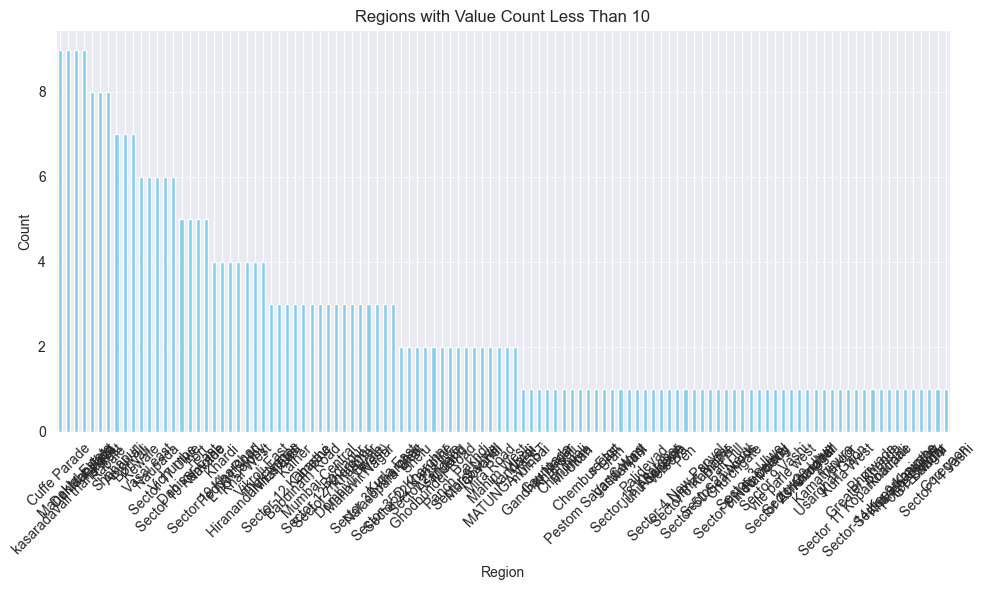

In [26]:
region_counts = df['region'].value_counts()

# Step 3: Filter counts less than 10
region_counts_filtered = region_counts[region_counts < 10]

# Step 4: Plot the filtered counts
plt.figure(figsize=(10, 6))
region_counts_filtered.plot(kind='bar', color='skyblue')
plt.title('Regions with Value Count Less Than 10')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()